<a href="https://colab.research.google.com/github/inwoo0206/repository/blob/main/201920989.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

In [25]:
batch_size = 100

In [26]:
class Encoder(nn.Module):
  def __init__(self):
    super(Encoder,self).__init__()
    self.layer1 = nn.Sequential(
      nn.Conv2d(1,16,3,padding=1), # 16 x 28 x 28
      nn.ReLU(),
      nn.BatchNorm2d(16),
      nn.Conv2d(16,32,3,padding=1), # 32 x 28 x 28
      nn.ReLU(),
      nn.BatchNorm2d(32),
      nn.Conv2d(32,64,3,padding=1), # 64 x 28 x 28
      nn.ReLU(),
      nn.BatchNorm2d(64),
      nn.MaxPool2d(2,2) # 64 x 14 x 14
    )
    self.layer2 = nn.Sequential(
      nn.Conv2d(64,128,3,padding=1), # 128 x 14 x 14
      nn.ReLU(),
      nn.BatchNorm2d(128),
      nn.MaxPool2d(2,2),
      nn.Conv2d(128,256,3,padding=1), # 256 x 7 x 7
      nn.ReLU()
    )
  def forward(self,x):
      out = self.layer1(x)
      out = self.layer2(out)
      out = out.view(batch_size, -1)
      return out

In [38]:
import torch
import torch.nn as nn

class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.layer1 = nn.Sequential(
            nn.ConvTranspose2d(256, 128, 3, 2, 1, 1),  # 128 x 14 x 14
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.ConvTranspose2d(128, 64, 3, 1, 1),  # 64 x 14 x 14
            nn.ReLU(),
            nn.BatchNorm2d(64)
        )
        self.layer2 = nn.Sequential(
            nn.ConvTranspose2d(64, 16, 3, 1, 1),  # 16 x 14 x 14
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.ConvTranspose2d(16, 1, 3, 2, 1, 1),  # 1 x 28 x 28
            nn.ReLU()
        )

    def forward(self, x):  # forward 메서드가 클래스 바깥에 있어야 합니다.
        batch_size = x.size(0)  # batch_size를 x의 첫 번째 차원으로 설정
        out = x.view(batch_size, 256, 7, 7)
        out = self.layer1(out)
        out = self.layer2(out)
        return out


In [37]:
mnist_train = dset.MNIST("./data/MNIST", train=True,
    transform=transforms.ToTensor(), target_transform=None, download=True)

mnist_test = dset.MNIST("./data/MNIST", train=False,
    transform=transforms.ToTensor(), target_transform=None, download=True)

In [29]:
batch_size = 100

train_loader = torch.utils.data.DataLoader(mnist_train,
  batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True)

test_loader = torch.utils.data.DataLoader(mnist_test,
  batch_size=batch_size, shuffle=False, num_workers=2, drop_last=True)

In [39]:
num_epoch = 10
learning_rate = 0.0002

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
encoder = Encoder().to(device)
decoder = Decoder().to(device)

parameters = itertools.chain(encoder.parameters(), decoder.parameters())
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(parameters, lr=learning_rate)

In [40]:
for i in range(1):
  for j,[image, label] in enumerate(test_loader):

    image = image.to(device)
    z = encoder(image)
    output = decoder(z)

    loss = loss_func(output,image)
# if j % 10 == 0:
# print(loss)
    print("loss is", loss.cpu().item())

loss is 0.5849569439888
loss is 0.5820639133453369
loss is 0.5805167555809021
loss is 0.5857843160629272
loss is 0.5845074653625488
loss is 0.5862212181091309
loss is 0.5853933691978455
loss is 0.5901710391044617
loss is 0.5787670016288757
loss is 0.5874695777893066
loss is 0.5832120776176453
loss is 0.5762409567832947
loss is 0.585299551486969
loss is 0.5898303985595703
loss is 0.5848715305328369
loss is 0.5811939239501953
loss is 0.5836477875709534
loss is 0.5881314277648926
loss is 0.5877081751823425
loss is 0.5807554125785828
loss is 0.5779240131378174
loss is 0.5835571885108948
loss is 0.5859602689743042
loss is 0.5883721113204956
loss is 0.5884419679641724
loss is 0.584030032157898
loss is 0.5862930417060852
loss is 0.5815579295158386
loss is 0.5834935307502747
loss is 0.588714063167572
loss is 0.5846725106239319
loss is 0.5875133872032166
loss is 0.587159276008606
loss is 0.5881618857383728
loss is 0.5793409943580627
loss is 0.5768699049949646
loss is 0.580285370349884
loss is 0

torch.Size([100, 28, 28])


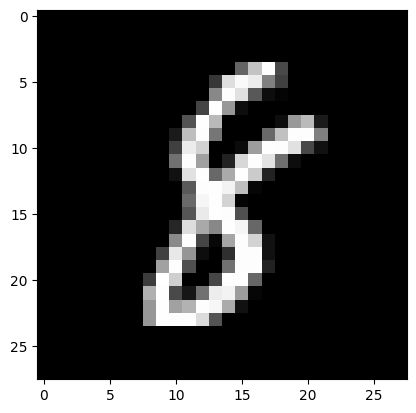

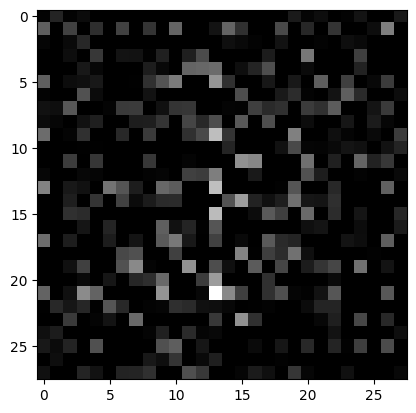

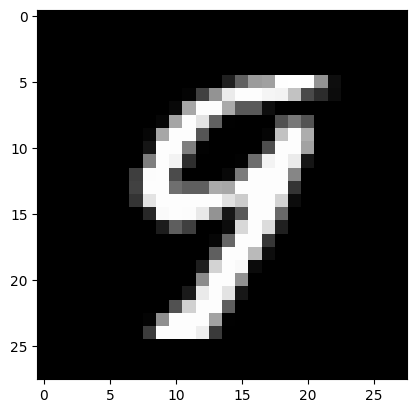

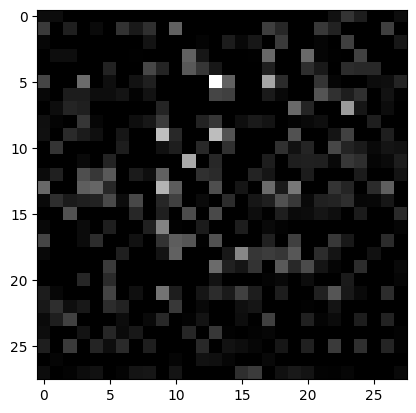

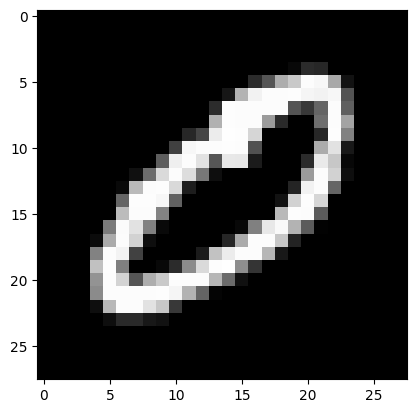

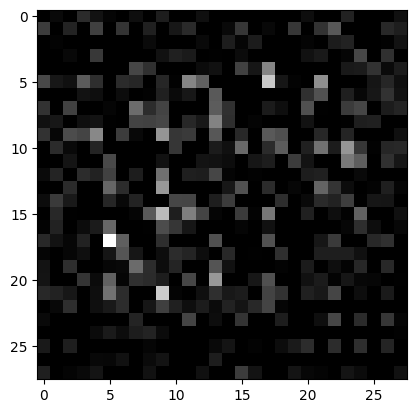

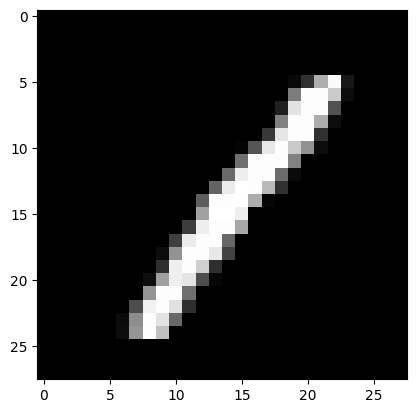

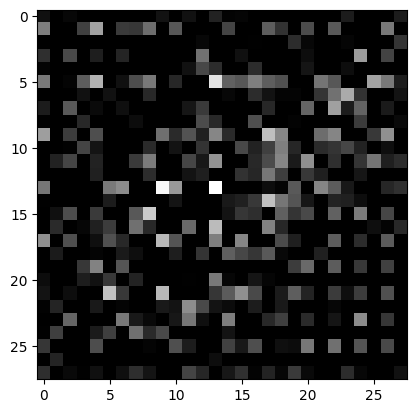

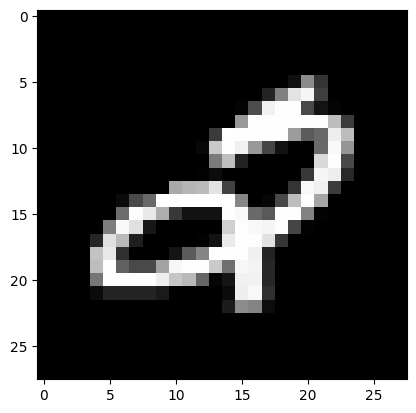

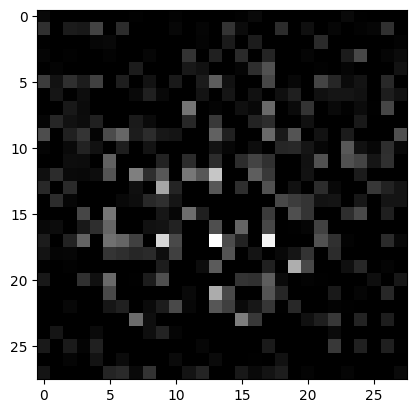

In [41]:
out_img = torch.squeeze(output.cpu().data)
print(out_img.size())

for i in range(5):
  plt.imshow(torch.squeeze(image[i].cpu()).data.numpy(),cmap='gray')
  plt.show()
  plt.imshow(out_img[i].numpy(),cmap='gray')
  plt.show()